In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

from cell_class import Cells
from class_population import Population
from land_dataset_fitness import CellDiff_Dataset_Landscape
from morphogen_regimes import *
from landscape_visuals import *
from helper_func import plot_cell_proportions, get_cell_data
from landscape_segmentation import Somitogenesis_Landscape  #########
from class_module import Node, UnstableNode, Center, NegCenter

save_dir = 'saved_files/'

In [4]:
# Cell Initialization
from cell_class import Cells


t0 = 0.
tf = 60.
tc = 52.
div = 40 #40 cells
repl = 20 #20 replicates
#Total num cell = 40*20 = 800
nt = int(tf*3)
noise_init = 0.5
init_cond=(-8, 0)

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [5]:
time_pars = (t0, tf, nt)
morphogen_times = (tc,)

par_limits = {
    'x': (-10.,10.),
    'y': (-5., 5.),
    'a': (0.2,3.),
    's': (0.2, 2)
}

par_choice_values = {
    'tau': (5.,),
    'tilt_lmt': (-0.41, -0.01),
}

landscape_pars = {
    'A0': 0.00005,
    'init_cond': (0., 0.),
    'regime': mr_sigmoid,
    'n_regimes': 2,
    'morphogen_times': morphogen_times,
    'used_fp_types': (Node,),
    'immutable_pars_list': [],
    'tilt': -0.35,
    'tilt_par': (0.5)
}

prob_pars = {
    'prob_tilt': 0.10,
    'prob_add': 0.15,
    'prob_drop': 0.15,
    'prob_shuffle': 0.
    # the rest is mutation of parameters
}

fitness_pars = {
    'ncells': 50,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells
    'noise': 0.3,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
    'tilt': (-0.001, -0.4)
}

-0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 

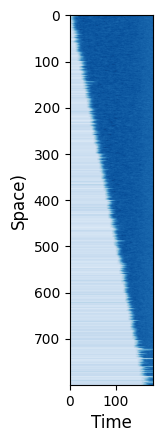

In [6]:
#  Starting with 2 random nodes, then any modules can be added or deleted
start_module_list = [Node.generate(par_limits, par_choice_values, n_regimes=2) for i in range(2)]

# Population size should be even, adjust N to your computing capacity
N = 16
P = Population(cell = cell,N = N, problem_type = Somitogenesis_Landscape, landscape_pars = landscape_pars, prob_pars = prob_pars, fitness_pars = fitness_pars, par_limits = par_limits, par_choice_values = par_choice_values, start_module_list = start_module_list)

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space)', fontsize=12)
plt.show()

In [7]:
print(P.landscape_list[0].result)

[[-8.487086   -8.10678158 -7.83548138 ... -3.90802566 -3.93529278
  -3.92677836]
 [-8.09276074 -7.77512738 -7.49279956 ... -3.82834687 -3.63413882
  -3.93514999]
 [-7.70918771 -7.7306986  -6.99375268 ... -3.99183644 -3.99271616
  -3.79000247]
 ...
 [-7.69838243 -7.69838243 -7.69838243 ... -3.67528145 -3.77872456
  -3.85986038]
 [-7.91640747 -7.91640747 -7.91640747 ... -3.76956202 -3.8519288
  -4.09574582]
 [-7.63294422 -7.63294422 -7.63294422 ... -3.99665105 -3.98088019
  -3.8961814 ]]


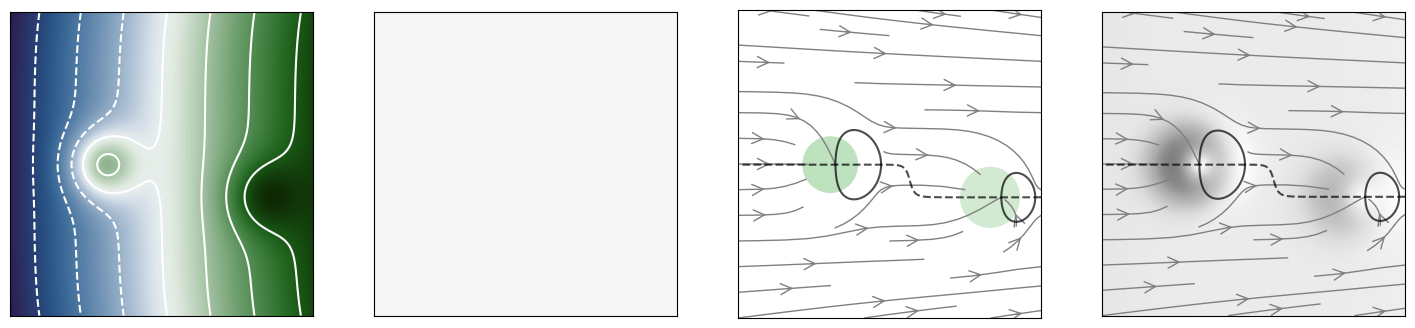

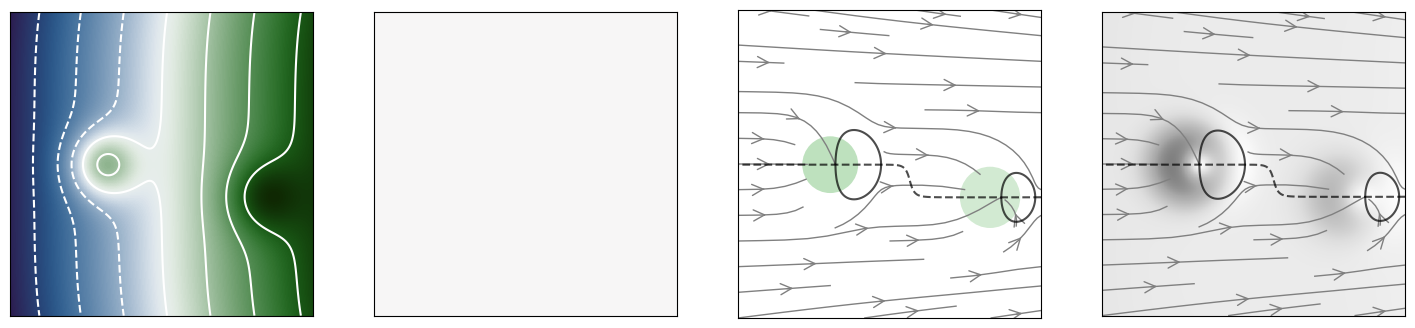

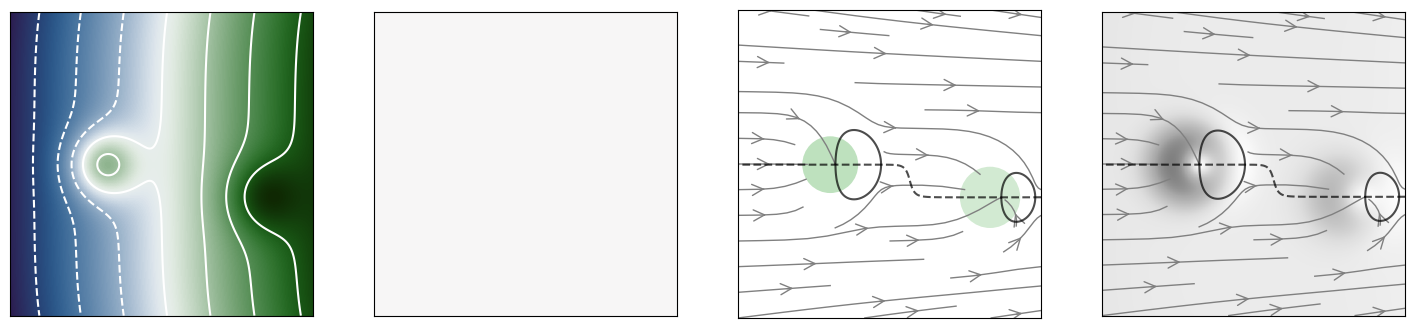

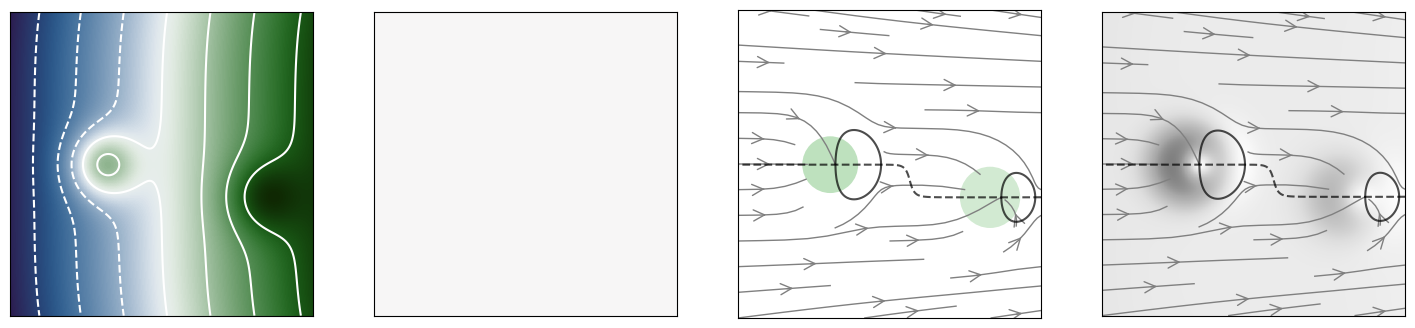

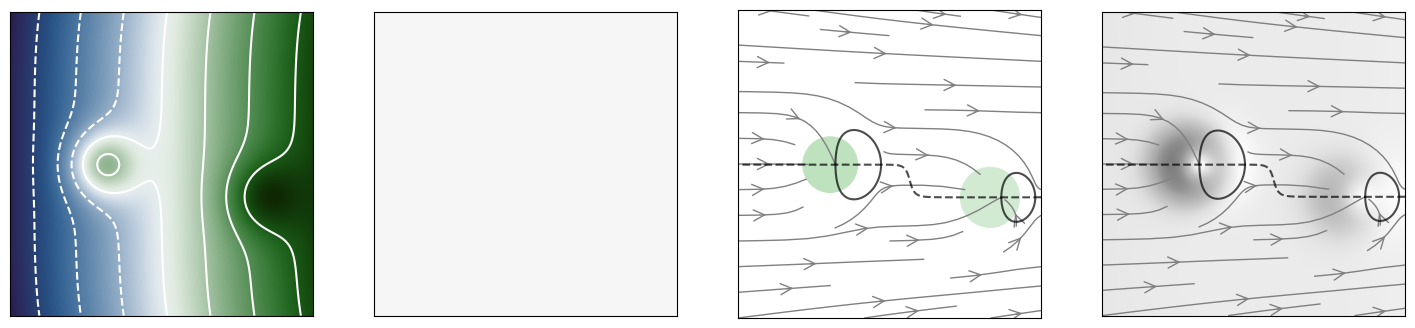

In [8]:
landscape = P.landscape_list[0]

L = 10.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((-5,-2, 0, 2, 5,))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, color_scheme='fp_types', plot_traj=True,
                             traj_init_cond=(0., 0.), traj_times=(0., 25., 251))

In [9]:
print(P.landscape_list[0])

Landscape with modules:
Node at (6.63412, -2.16613), a = [0.48931 0.81318], s = [1.6858  1.42639], tau = 5.0,
Node at (-3.90638, -0.04358), a = [1.0458  2.45713], s = [1.56179 0.94803], tau = 5.0


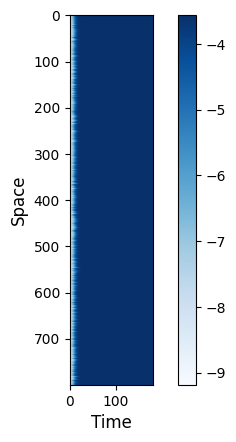

In [10]:
plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
plt.colorbar()
plt.show()

In [12]:
save_dir = 'saved_files/'
fitness_traj = P.evolve_parallel(300, fitness_pars, save_dir, save_each=5)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
# plt.ylim((-2,0))
plt.show()

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[:, -1], lw=2)
plt.title('Final pattern', fontsize=12)
plt.xlabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[20, :], lw=2)
plt.title('Single-cell dynamics', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.show()

print(P.landscape_list[0])

Timecode: 20240729-112618


KeyboardInterrupt: 